In [16]:
from datetime import datetime 

import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
#parse data 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#label encoding on categorical data 

#FAMA 49CRSP Common Stocks 
df = pd.read_csv('FAMA_49CRSP.csv', dtype={'public_date' : str})

In [17]:
import sklearn.preprocessing 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

#preprocessing here
#sort by date 
df = df.sort_values(by = 'public_date', ascending = True)
df = df.dropna()

#encode integer categories into numbers 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df.FFI49_desc)
df.FFI49_desc = integer_encoded

#df = df.dropna()

ewlabels = df.indret_ew
vwlabels = df.indret_vw

df = df.drop(labels=['indret_ew', 'indret_vw'], axis=1)
#3year on year change as a prediction feature, raw pct change 
yoythree = ewlabels.diff(periods = 3)
#3 years rolling percent change, averaged ie. (y1-y2 + (y3-y2)change)/2 
rollavgpct = ewlabels.rolling(3).mean()

#drop first 3 years
df = df.iloc[3:]
ewlabels = ewlabels.iloc[3:]
yoythree = yoythree.iloc[3:]
#yoypctthree = yoypctthree.iloc[3:]
rollavgpct = rollavgpct.iloc[3:]

#add -1 and 1 so the bins will take on bins to be equal and set to max -1 and 1
#extrema = pd.Series([-1,1])
#ewnlabels = ewlabels.append(extrema)

#make a new output (bucket by percentage?)
# enc = KBinsDiscretizer(n_bins=8, encode='ordinal',strategy = 'uniform')
# ewnlabels = np.asarray(ewnlabels)
# ewnlabels = ewnlabels.reshape((-1,1))
# labels_binned = enc.fit_transform(ewnlabels)

# labels_binned = labels_binned[:-2]

#1 Split-Timer series data, 0.64 Train, 0.16 dev, 0.2 Test
#x_train, x_test, y_train, y_test = train_test_split(df, labels_binned, test_size = 0.2, shuffle = False)
x_train, x_test, y_train, y_test = train_test_split(df, ewlabels, test_size = 0.2, shuffle = False)
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size = 0.2, shuffle = False)

In [18]:
def get_dates(x_train, x_dev, x_test):
    train_dates = [datetime(year=int(x[0:4]), month=int(x[4:6]), day=int(x[6:8])) for x in x_train['public_date']] 
    dev_dates = [datetime(year=int(x[0:4]), month=int(x[4:6]), day=int(x[6:8])) for x in x_dev['public_date']]
    test_dates = [datetime(year=int(x[0:4]), month=int(x[4:6]), day=int(x[6:8])) for x in x_test['public_date']]
    
    x_train = x_train.drop('public_date', axis=1)
    x_dev = x_dev.drop('public_date', axis=1)
    x_test = x_test.drop('public_date', axis=1)
    
    return train_dates, dev_dates, test_dates, x_train, x_dev, x_test

train_dates, dev_dates, test_dates, x_train, x_dev, x_test = get_dates(x_train, x_dev, x_test)

print(x_train.shape)
print(x_test.shape)

(13167, 70)
(4115, 70)


In [4]:
from matplotlib import pyplot

fig1 = pyplot.figure(1, figsize = (6,6))
pyplot.plot(train_dates, y_train, color = 'green', label = 'industry_ew_train')
pyplot.plot(dev_dates, y_dev, color = 'yellow', label = 'industry_ew_dev')
pyplot.plot(test_dates, y_test, color = 'red', label = 'industry_ew_test')
pyplot.xlabel('Date')
pyplot.ylabel('Industry Return (Equally Weighted)')
pyplot.legend()
pyplot.show()

<Figure size 600x600 with 1 Axes>

In [30]:
#tutorial keras practice
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/


#####IGNORE THIS!!!!!!!!
from keras.models import Sequential
from keras.layers import Dense, Activation,Softmax
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import numpy

model = Sequential()
#parameters = number of neurons, initialization method, activation function
model.add(Dense(32, input_dim=76, init = 'uniform', activation = 'relu'))
model.add(Dense(16, init = 'uniform', activation = 'relu'))
model.add(Dense(1, init = 'uniform', activation = 'sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_tra, y_tra, epochs=25, batch_size=32)


print("----------------------------------------------------------")
scores = model.evaluate(x_tra,y_tra)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")

y_devpred = model.predict(x_dev)
print("--------------------------------------------")
print(mean_squared_error(y_dev,y_devpred))

/home/klchou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=76, activation="relu", kernel_initializer="uniform")`
  
/home/klchou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/home/klchou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  app.launch_new_instance()


NameError: name 'x_tra' is not defined

Epoch 1/50
13167/13167 [==============================] - 1s 80us/step - loss: 0.0978 - mean_squared_error: 0.0978 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 11898.8460 - cosine_proximity: -0.0873
Epoch 2/50
13167/13167 [==============================] - 1s 53us/step - loss: 0.0049 - mean_squared_error: 0.0049 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 9403.1272 - cosine_proximity: -0.1198
Epoch 3/50
13167/13167 [==============================] - 1s 53us/step - loss: 0.0049 - mean_squared_error: 0.0049 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 14084.0951 - cosine_proximity: -0.1306
Epoch 4/50
13167/13167 [==============================] - 1s 53us/step - loss: 0.0050 - mean_squared_error: 0.0050 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 10834.7172 - cosine_proximity: -0.0948
Epoch 5/50
13167/13167 [==============================] - 1s 54us/step - loss: 0.0050 - mean_squared_error: 0.0050 - mean_absolut

13167/13167 [==============================] - 1s 53us/step - loss: 0.0047 - mean_squared_error: 0.0047 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 11272.0011 - cosine_proximity: -0.1738
Epoch 39/50
13167/13167 [==============================] - 1s 47us/step - loss: 0.0047 - mean_squared_error: 0.0047 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 11417.5079 - cosine_proximity: -0.1741
Epoch 40/50
13167/13167 [==============================] - 1s 48us/step - loss: 0.0047 - mean_squared_error: 0.0047 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 11735.0031 - cosine_proximity: -0.1739
Epoch 41/50
13167/13167 [==============================] - 1s 48us/step - loss: 0.0047 - mean_squared_error: 0.0047 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 11759.1908 - cosine_proximity: -0.1721
Epoch 42/50
13167/13167 [==============================] - 1s 45us/step - loss: 0.0047 - mean_squared_error: 0.0047 - mean_absolute_erro

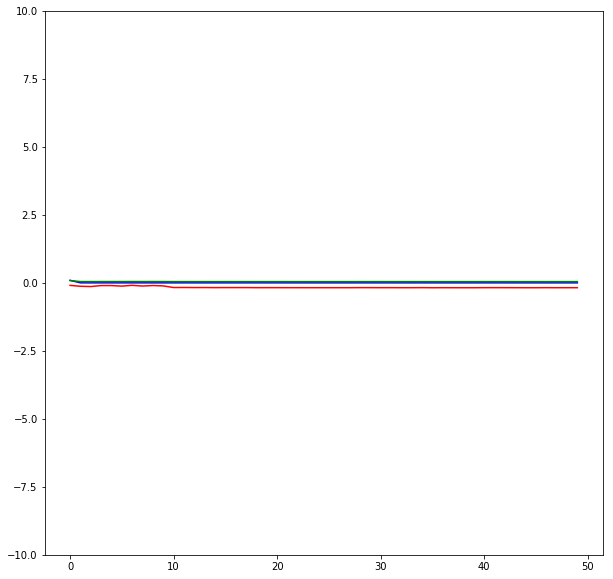

----------------------------------------------------------
13167/13167 [==============================] - 0s 36us/step

loss: 0.00%

mean_squared_error: 0.00%

mean_absolute_error: 0.05%

mean_absolute_percentage_error: 8579.12%

cosine_proximity: -0.18%
----------------------------------------------------------
3292/3292 [==============================] - 0s 21us/step

loss: 0.01%

mean_squared_error: 0.01%

mean_absolute_error: 0.06%

mean_absolute_percentage_error: 189.31%

cosine_proximity: -0.12%


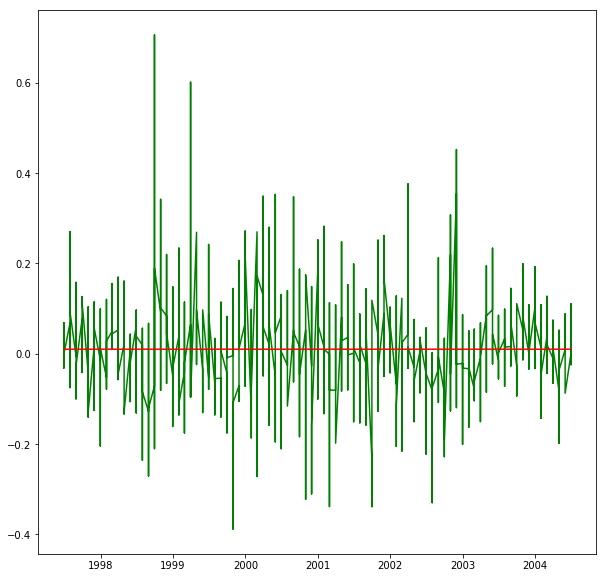

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
4115/4115 [==============================] - 0s 30us/step

loss: 0.01%

mean_squared_error: 0.01%

mean_absolute_error: 0.05%

mean_absolute_percentage_error: 2619.43%

cosine_proximity: -0.16%


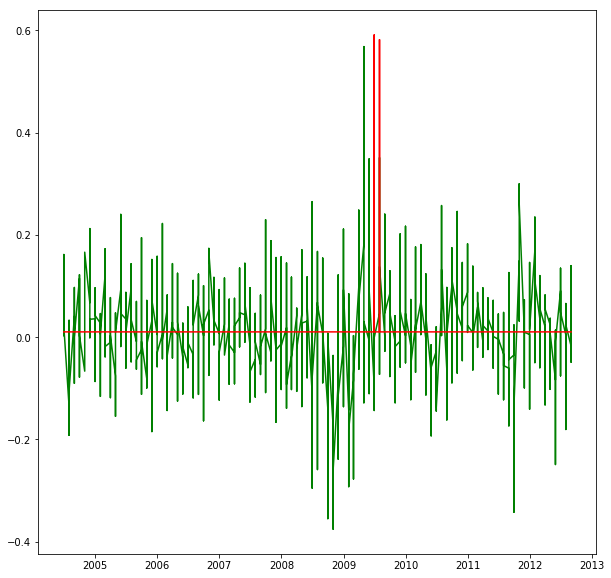

In [13]:
#Regression Model:
#1 Layer: 76 -> 12.78% and 15.28%
#2 Layer: 76,1 -> 0.40% and 0.48%
#3 Layers: 76, 32, 1 -> 0% and 65%
#4 layers: 76,48,32,1 + adam +  -> 60.52% and 56.70%
#4 Layers: 76,32,16,1 -> 61.33% and 57.18%
#4 Layers: 76,32,8,1 -> 0%
#4 layers: 76,48,8,1 -> 0%
#6 layers: 76,48,32,16,8,1 -> 20% and 0%

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
import seaborn as sns


model = Sequential()
#parameters = number of neurons, initialization method, activation function
model.add(Dense(72, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
#model.add(Dense(48, kernel_initializer='normal',activation = 'relu'))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
#model.add(Dense(16, kernel_initializer='normal',activation = 'relu'))
model.add(Dense(8, kernel_initializer='normal',activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
    
# Compile model
#opt = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
history = model.fit(np.asarray(x_train), y_train, epochs=50)

fig2 = pyplot.figure(2,figsize = (10,10))
pyplot.plot(history.history['mean_squared_error'], color = 'blue')
pyplot.plot(history.history['mean_absolute_error'], color = 'green')
pyplot.plot(history.history['mean_absolute_percentage_error'], color = 'orange')
pyplot.plot(history.history['cosine_proximity'], color = 'red')
pyplot.ylim(-10,10)
pyplot.show()

#train set
print("----------------------------------------------------------")
train_predictions = model.predict(x_train) 
scores = model.evaluate(np.asarray(x_train), y_train)
for i in range(len(scores)):
    print("\n%s: %.2f%%" % (model.metrics_names[i], scores[i]))

#dev set
print("----------------------------------------------------------")
dev_predictions = model.predict(x_dev) 
scores = model.evaluate(np.asarray(x_dev),y_dev)
for i in range(len(scores)):
    print("\n%s: %.2f%%" % (model.metrics_names[i], scores[i]))

fig3 = pyplot.figure(3, figsize = (10,10))
pyplot.plot(dev_dates, y_dev, color = 'green')
pyplot.plot(dev_dates, dev_predictions, color = 'red')
pyplot.show()

#test set
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
test_predictions = model.predict(x_test).reshape((-1))
scores = model.evaluate(np.asarray(x_test),y_test)
for i in range(len(scores)):
    print("\n%s: %.2f%%" % (model.metrics_names[i], scores[i]))

fig4 = pyplot.figure(4, figsize = (10,10))
pyplot.plot(test_dates, y_test, color = 'green')
pyplot.plot(test_dates, test_predictions, color = 'red')
pyplot.show()

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import numpy

model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], init = 'uniform', activation = 'relu'))
model.add(Dense(16, init = 'uniform', activation = 'relu'))
model.add(Dense(8, init = 'uniform', activation = 'softmax'))

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=25, batch_size=32)


print("----------------------------------------------------------")
scores = model.evaluate(x_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
y_devpred = model.predict(x_dev)
print("--------------------------------------------")
print(mean_squared_error(y_dev,y_devpred))

/home/klchou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=72, activation="relu", kernel_initializer="uniform")`
  
/home/klchou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/klchou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="softmax", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


ValueError: Error when checking target: expected dense_33 to have shape (8,) but got array with shape (1,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Softmax
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(32, input_shape = (x_train.shape)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

model.fit(x_train, y_train, epochs=5, batch_size=32)
y_devpred = model.predict(x_dev)
print("--------------------------------------------")
print(mean_squared_error(y_dev,y_devpred))
